## Nabeel Rehemtulla
## Lab 7 - Radio Imaging

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [31]:
#Helps us set the x axis bounds of our spectra graphs 
frequency = np.linspace(1416, 1426, 1024)

#This is the gaussian function we will use to fit the curve
def gaussian(x, mu, sigma, a):
    return (a / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mu)/sigma)**2)

## Azimuth

In [32]:
#Fetch the files
data_folder = 'sun_azimuth/'

az_files = glob.glob(data_folder + "sun*") 
az_files.sort()

In [43]:
az_spectra = []

for az_file in az_files: #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: #This opens up the file and puts each line into a list called az_data
        
        spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            
        az_spectra.append(tot_spectrum)

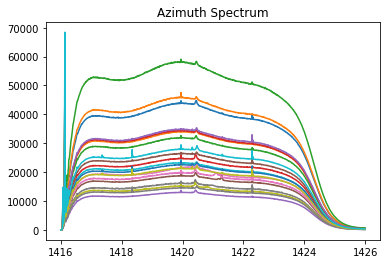

In [44]:
for i in range(0,20):
    plt.plot(frequency, az_spectra[i])

plt.title('Azimuth Spectrum')
plt.show()

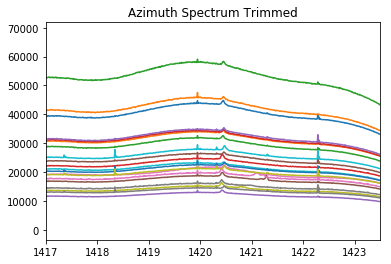

In [34]:
az_spectra_trimmed = []

for i in range(0,20):
    az_spectra_trimmed.append(az_spectra[i])
    plt.plot(frequency, az_spectra_trimmed[i])
  
#Zoom in past the sharp ends
plt.xlim([1417, 1423.5])
plt.title('Azimuth Spectrum Trimmed')
plt.show()

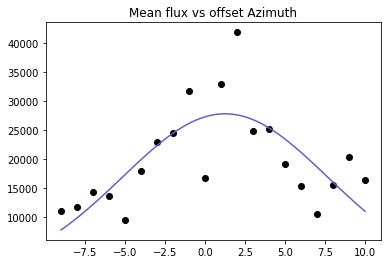

In [35]:
az_means = []

for i in range(0,20):
    az_means.append(az_spectra_trimmed[i].mean())
 
#This is necessary becaues of the way the glob sorted the files
x_axis = [-1, -2, -3, -4, -5, -6, -7, -8, -9, 0, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_lin = np.linspace(-9, 10, 100)

#Guesses for what our fitting parameters will be
sigma = 5
mu = 1
a = 30000

#executes the fit using the guassian function defined at the top and our three guesses
coeffs, filterr = curve_fit(gaussian, x_axis, az_means, p0=(mu, sigma, a))

plt.title('Mean flux vs offset Azimuth')
plt.scatter(x_axis, az_means, c='black')
plt.plot(x_lin, gaussian(x_lin, *coeffs), 'slateblue')

In [36]:
#calculates FWHM
FWHM_az = 2 * np.sqrt(2 * np.log(2)) * coeffs[1]
print('Full Width Half Max for Azimuth', FWHM_az)

Full Width Half Max for Azimuth 15.11226059765892


## Elevation
Repeats the same code for the elevation data

In [37]:
data_folder = 'sun_elevation/'

el_files = glob.glob(data_folder + "sun*") 
el_files.sort()

In [45]:
el_spectra = []

for el_file in el_files: #Pull each individual filename from the list of azimuth files
    
    with open(el_file) as el_data: #This opens up the file and puts each line into a list called az_data
        
        el_spectrum_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(el_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                el_spectrum_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        el_tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in el_spectrum_rows: 
            el_temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            el_spec = [] # Create an empty list to hold the spectral data
            for val in el_temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    el_spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            el_tot_spectrum = el_tot_spectrum + np.float64(el_spec) # Add the data from the current row to your total spectral data for this file.
            
        el_spectra.append(el_tot_spectrum)

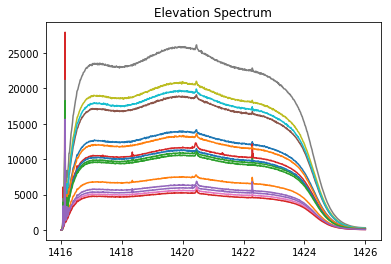

In [46]:
for i in range(0,15):
    plt.plot(frequency, el_spectra[i])

plt.title('Elevation Spectrum')
plt.show()

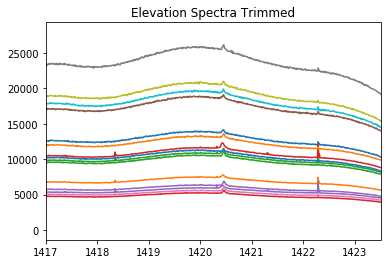

In [39]:
el_spectra_trimmed = []

for i in range(0,15):
    el_spectra_trimmed.append(el_spectra[i])
    plt.plot(frequency, el_spectra_trimmed[i])
    
plt.xlim([1417, 1423.5])
plt.title('Elevation Spectra Trimmed')
plt.show()

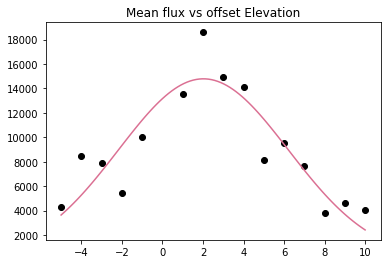

In [40]:
el_means = []

for i in range(0,15):
    el_means.append(el_spectra_trimmed[i].mean())

x_axis = [-1, -2, -3, -4, -5, 1, 10, 2, 3, 4, 5, 6, 7, 8, 9]
x_lin = np.linspace(-5, 10, 100)

sigma = 4
mu = 2
a = 5

coeffs, filterr = curve_fit(gaussian, x_axis, el_means, p0=(mu, sigma, a))

plt.title('Mean flux vs offset Elevation')
plt.scatter(x_axis, el_means, c='black')
plt.plot(x_lin, gaussian(x_lin, *coeffs), 'palevioletred')

In [41]:
FWHM_el = 2 * np.sqrt(2 * np.log(2)) * coeffs[1]
print('Full Width Half Max for Elevation', FWHM_el)

Full Width Half Max for Elevation 9.871114216053373


In [48]:
#Diffraction Limit of our telescope (including factor of 1.22)
theta = 1.22 * 21 / 210
#want to convert theta to deg from rad
theta = np.rad2deg(theta)
print('diffration limit (deg)', theta)

diffration limit (deg) 6.990085100596044
